In [1]:
import os

In [2]:
import numpy as np


In [3]:
import pandas as pd


In [4]:
from scipy.misc import imread


In [5]:
from sklearn.metrics import accuracy_score


In [6]:
import tensorflow as tf


C:\Users\Gurudeo\Anaconda2\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [7]:
import keras

Using TensorFlow backend.


In [8]:
from keras.models import Sequential

In [9]:
from keras.layers import Dense, Flatten, InputLayer,Dropout,MaxPooling2D,Conv2D

In [10]:
import matplotlib.pyplot as plt

In [11]:
root_dir=os.path.abspath('C:/Users/Gurudeo/Desktop/Personal/Digits/')

In [12]:
data_dir = os.path.join(root_dir, 'data')


In [13]:
os.path.exists(root_dir)


True

In [14]:
os.path.exists(data_dir)


True

In [15]:
data=pd.read_csv(os.path.join(data_dir, 'Data', 'data.csv'))

In [16]:
msk = np.random.rand(len(data)) < 0.8

In [17]:
train = data[msk]
test = data[~msk]

In [18]:
train_temp = []
for img_name in train.filename:
    image_path = os.path.join(data_dir, 'Data', 'Images', 'data', img_name)
    img = imread(image_path, flatten=True)
    img = img.astype('float32')
    train_temp.append(img)
    

C:\Users\Gurudeo\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.


In [19]:
X_train=np.stack(train_temp)

In [20]:
temp = []
for img_name in test.filename:
    image_path = os.path.join(data_dir, 'Data', 'Images', 'data', img_name)
    img = imread(image_path, flatten=True)
    img = img.astype('float32')
    temp.append(img)
    

C:\Users\Gurudeo\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.


In [21]:
X_test=np.stack(train_temp)

In [22]:
X_train /= 255.0
X_train = X_train.reshape(-1, 784).astype('float32')
X_train=X_train.reshape(-1, 28, 28, 1)

In [23]:
X_test /= 255.0
X_test = X_test.reshape(-1, 784).astype('float32')
X_test=X_test.reshape(-1, 28, 28, 1)

In [24]:
y_train=keras.utils.np_utils.to_categorical(train.label.values)

In [25]:
y_test=keras.utils.np_utils.to_categorical(train.label.values)

In [26]:
input_shape=(784,)
input_reshape=(28,28,1)

In [27]:
filters=25
filtersize=(5,5)

In [28]:
pool_size=(2,2)


In [29]:
full_conn_layer=50

In [30]:
output_layer_neurons=10

In [31]:
epochs=10
batch_size=128

In [32]:
model1 = Sequential([
 InputLayer(input_shape=input_reshape),

 Conv2D(25, 5, 5, activation='relu'),
 MaxPooling2D(pool_size=pool_size),
  Dropout(0.2),
    Conv2D(25, 5, 5, activation='relu'),
 MaxPooling2D(pool_size=pool_size),
  Dropout(0.2),
 Conv2D(25, 4, 4, activation='relu'),
 Flatten(),
  Dense(output_dim=full_conn_layer, activation='relu'),
Dense(output_dim=output_layer_neurons, input_dim=full_conn_layer, activation='softmax'),
])

C:\Users\Gurudeo\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(25, (5, 5), activation="relu")`
  after removing the cwd from sys.path.
C:\Users\Gurudeo\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(25, (5, 5), activation="relu")`
  import sys
C:\Users\Gurudeo\Anaconda2\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(25, (4, 4), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Gurudeo\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=50)`
  if sys.path[0] == '':
C:\Users\Gurudeo\Anaconda2\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=50, activation="softmax", units=10)`
  del sys.pa

In [33]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 25)        650       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 25)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 25)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 25)          15650     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 25)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 25)          0         
__________

In [35]:
gmodel = model1.fit(X_train, y_train, epochs=5, batch_size=batch_size, validation_data=(X_test, y_test))

Train on 39153 samples, validate on 39153 samples
Epoch 1/5
39153/39153 [==============================] - 79s 2ms/step - loss: 0.4891 - acc: 0.8437 - val_loss: 0.1249 - val_acc: 0.9642
Epoch 2/5
39153/39153 [==============================] - 72s 2ms/step - loss: 0.1260 - acc: 0.9612 - val_loss: 0.0698 - val_acc: 0.9794
Epoch 3/5
39153/39153 [==============================] - 71s 2ms/step - loss: 0.0909 - acc: 0.9726 - val_loss: 0.0553 - val_acc: 0.9839
Epoch 4/5
39153/39153 [==============================] - 71s 2ms/step - loss: 0.0723 - acc: 0.9776 - val_loss: 0.0534 - val_acc: 0.9834
Epoch 5/5
39153/39153 [==============================] - 71s 2ms/step - loss: 0.0619 - acc: 0.9801 - val_loss: 0.0337 - val_acc: 0.9893


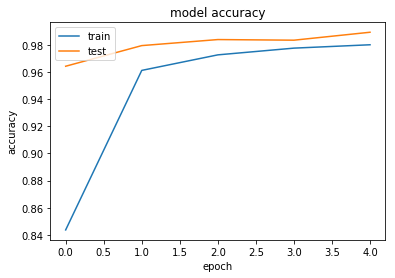

In [36]:
plt.plot(gmodel.history['acc'])
plt.plot(gmodel.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

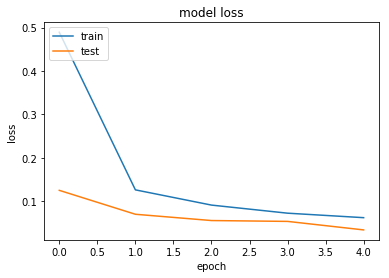

In [37]:
plt.plot(gmodel.history['loss'])
plt.plot(gmodel.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()